In [1]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans
# folium
import folium
import folium.plugins as plugins
from streamlit_folium import folium_static

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'


# Style
sns.set_style(style = 'darkgrid')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

In [2]:
# from googletrans import Translator
# tr = Translator(service_urls=['translate.googleapis.com'])
# tr = Translator()
# tr.translate(text="こんにちは", src="ja", dest="en").text

# df['review_translated'] = df['review'].apply(lambda x : tr.translate(x, src="ja", dest="en").text)

# df['reviwe_translated_original'] = df['review_translated']

In [3]:
df = pd.read_csv('review_jp_nlp.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [4]:
df.columns

Index(['reviewer_info', 'title', 'rating', 'review', 'date',
       'review_translated', 'reviwe_translated_original', 'sentiment',
       'emotion', 'em_x_senti'],
      dtype='object')

In [5]:
df.head(2)

reviewer_info  \
0  男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員   
1  男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員   

                                         title  rating  \
0  Work style (working hours/holidays/systems)     4.7   
1  Work style (working hours/holidays/systems)     4.7   

                                              review         date  \
0  勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...  2022年03月 6日   
1  勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...  2021年02月23日   

                                   review_translated  \
0  [ ' Working ' , ' HoursHolidaysHolidays ' , ' ...   
1  [ ' Working ' , ' HoursHolidaysHolidays ' , ' ...   

                          reviwe_translated_original sentiment emotion  \
0  Working Hours/Holidays/Holidays: It's up to yo...       neg     joy   
1  Working Hours/Holidays/Holidays: It's up to yo...       pos     joy   

       em_x_senti  
0  ('joy', 'neg')  
1  ('joy', 'pos')

In [6]:
df.shape

(686, 10)

In [7]:
senti_neg = df[df['sentiment'] == 'neg']
senti_pos = df[df['sentiment'] == 'pos']

### Positive

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-08-14 07:31:05.111 WARNING matplotlib.font_manager: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


Figure(2160x2160)


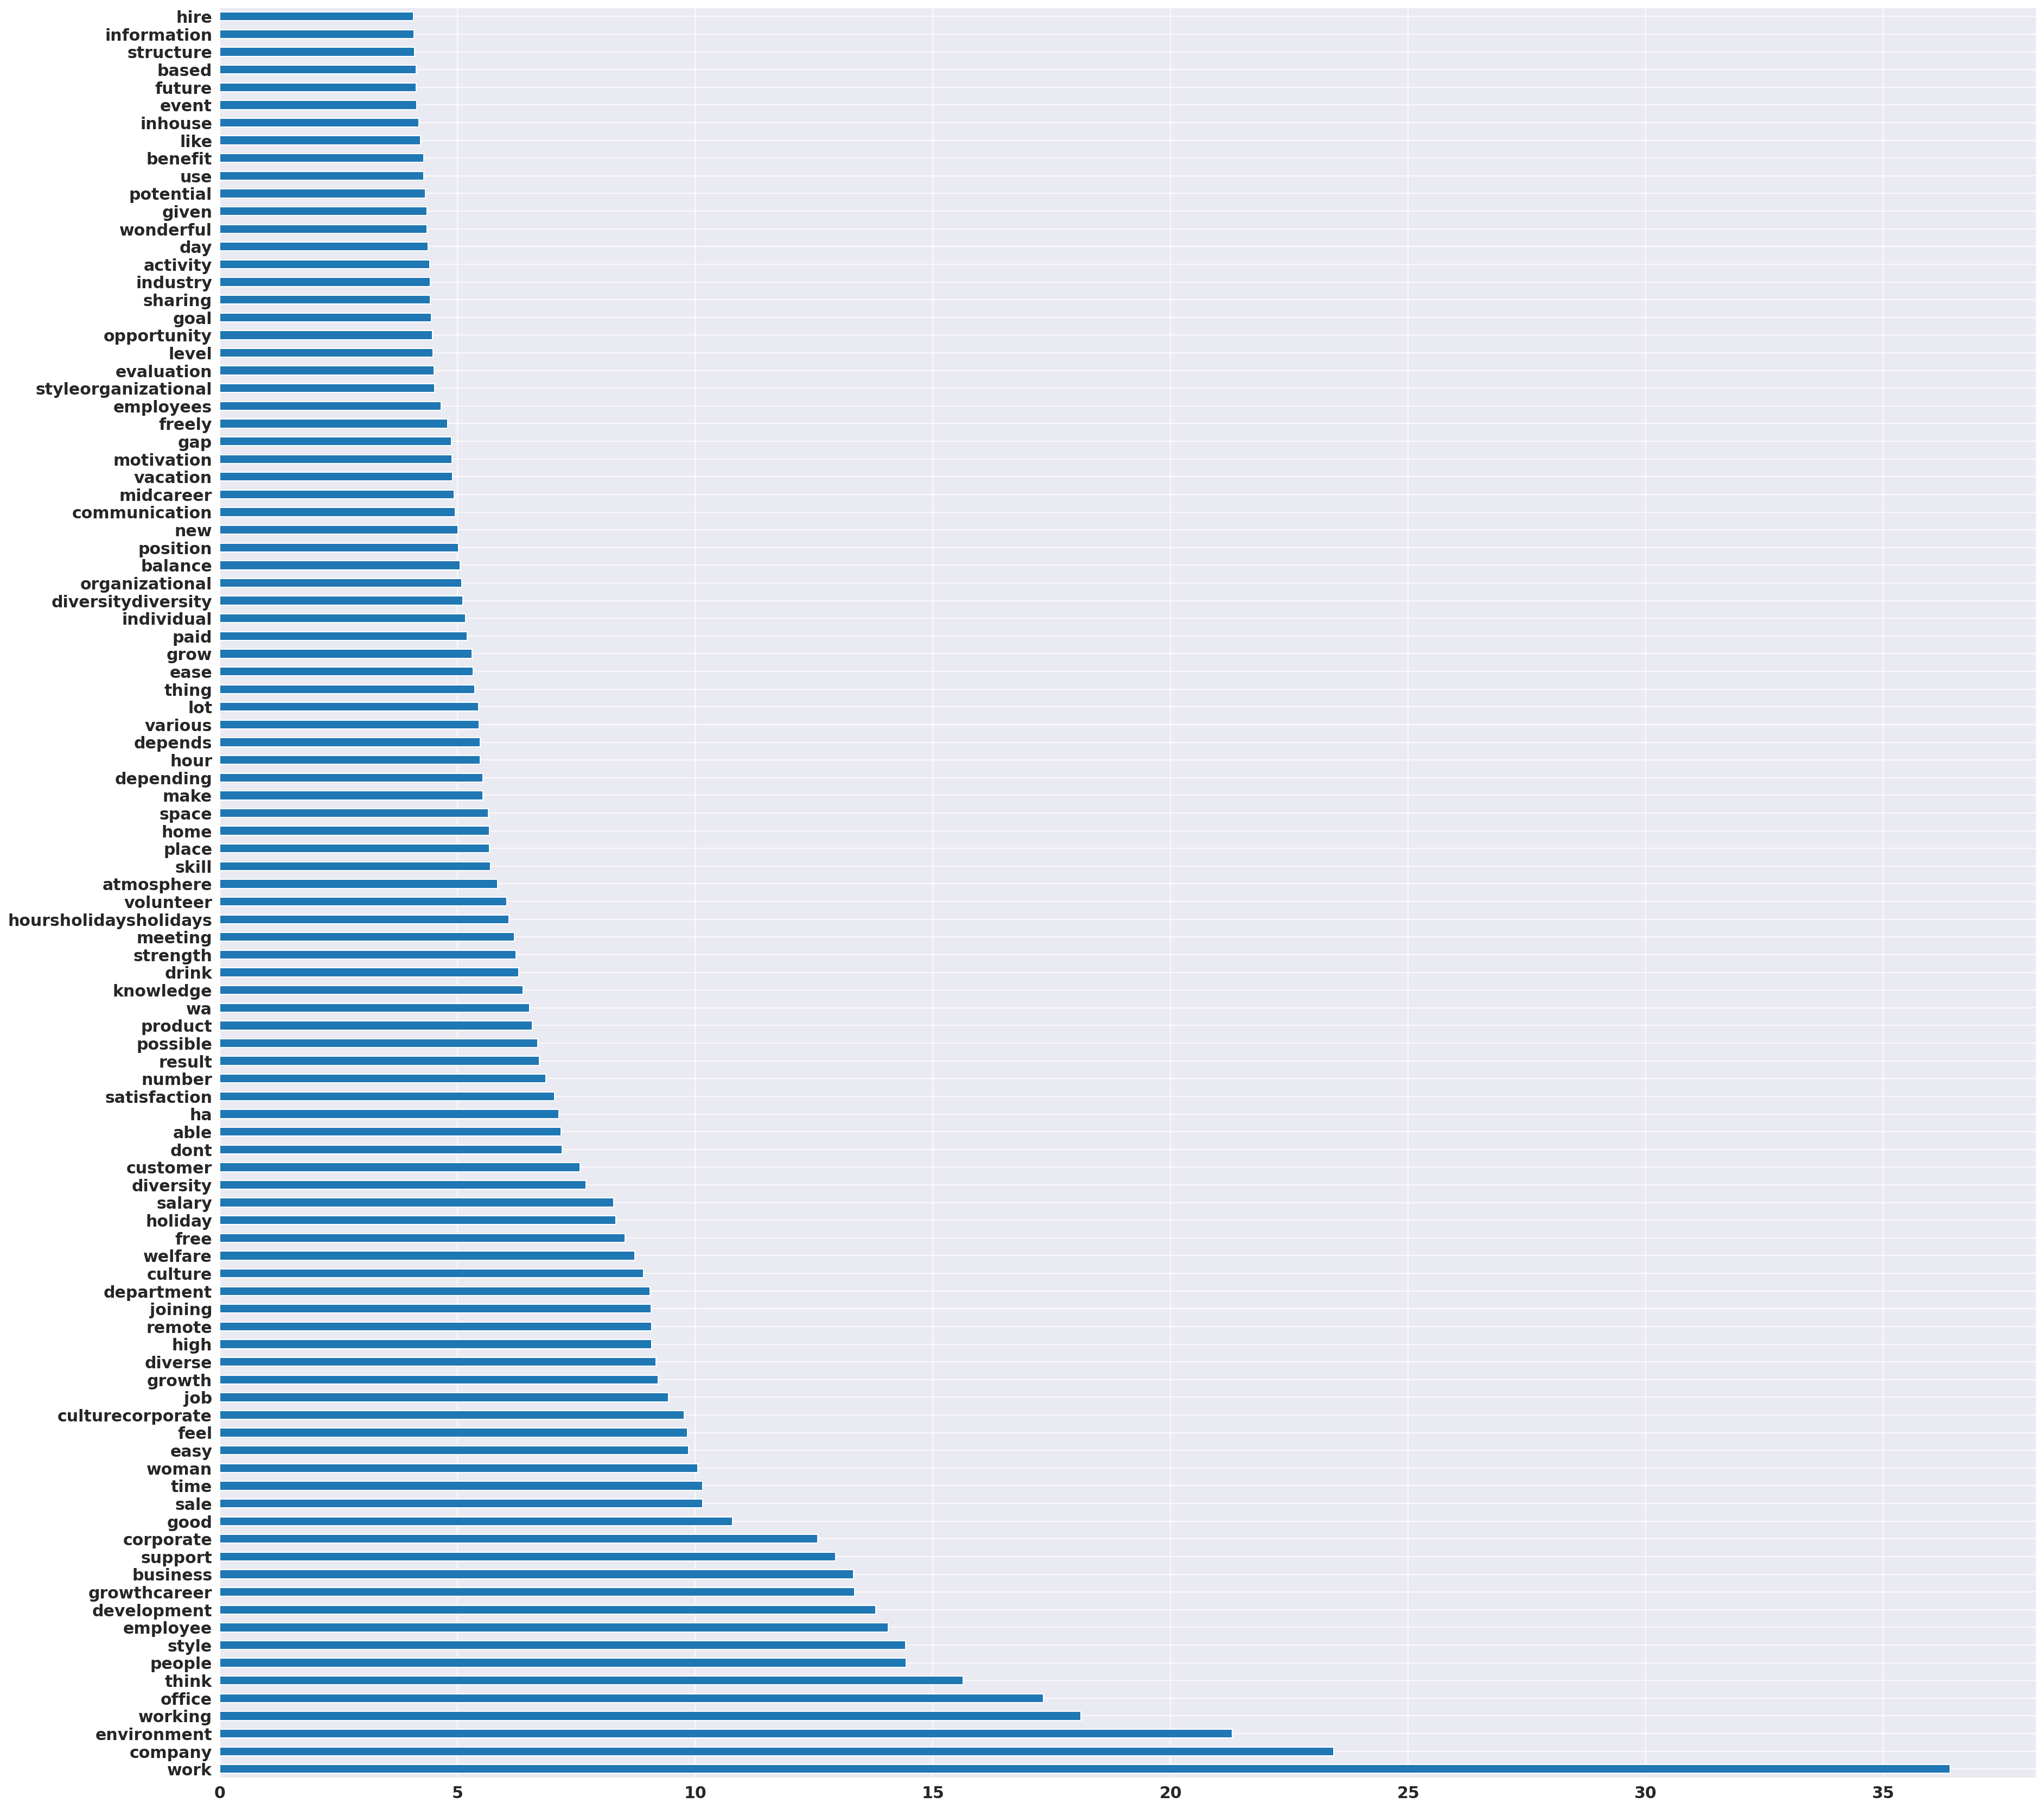

In [8]:
tf = TfidfVectorizer(stop_words='english', min_df=3)
tf.fit(senti_pos['review_translated'])

pro_tf = tf.transform(senti_pos['review_translated'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


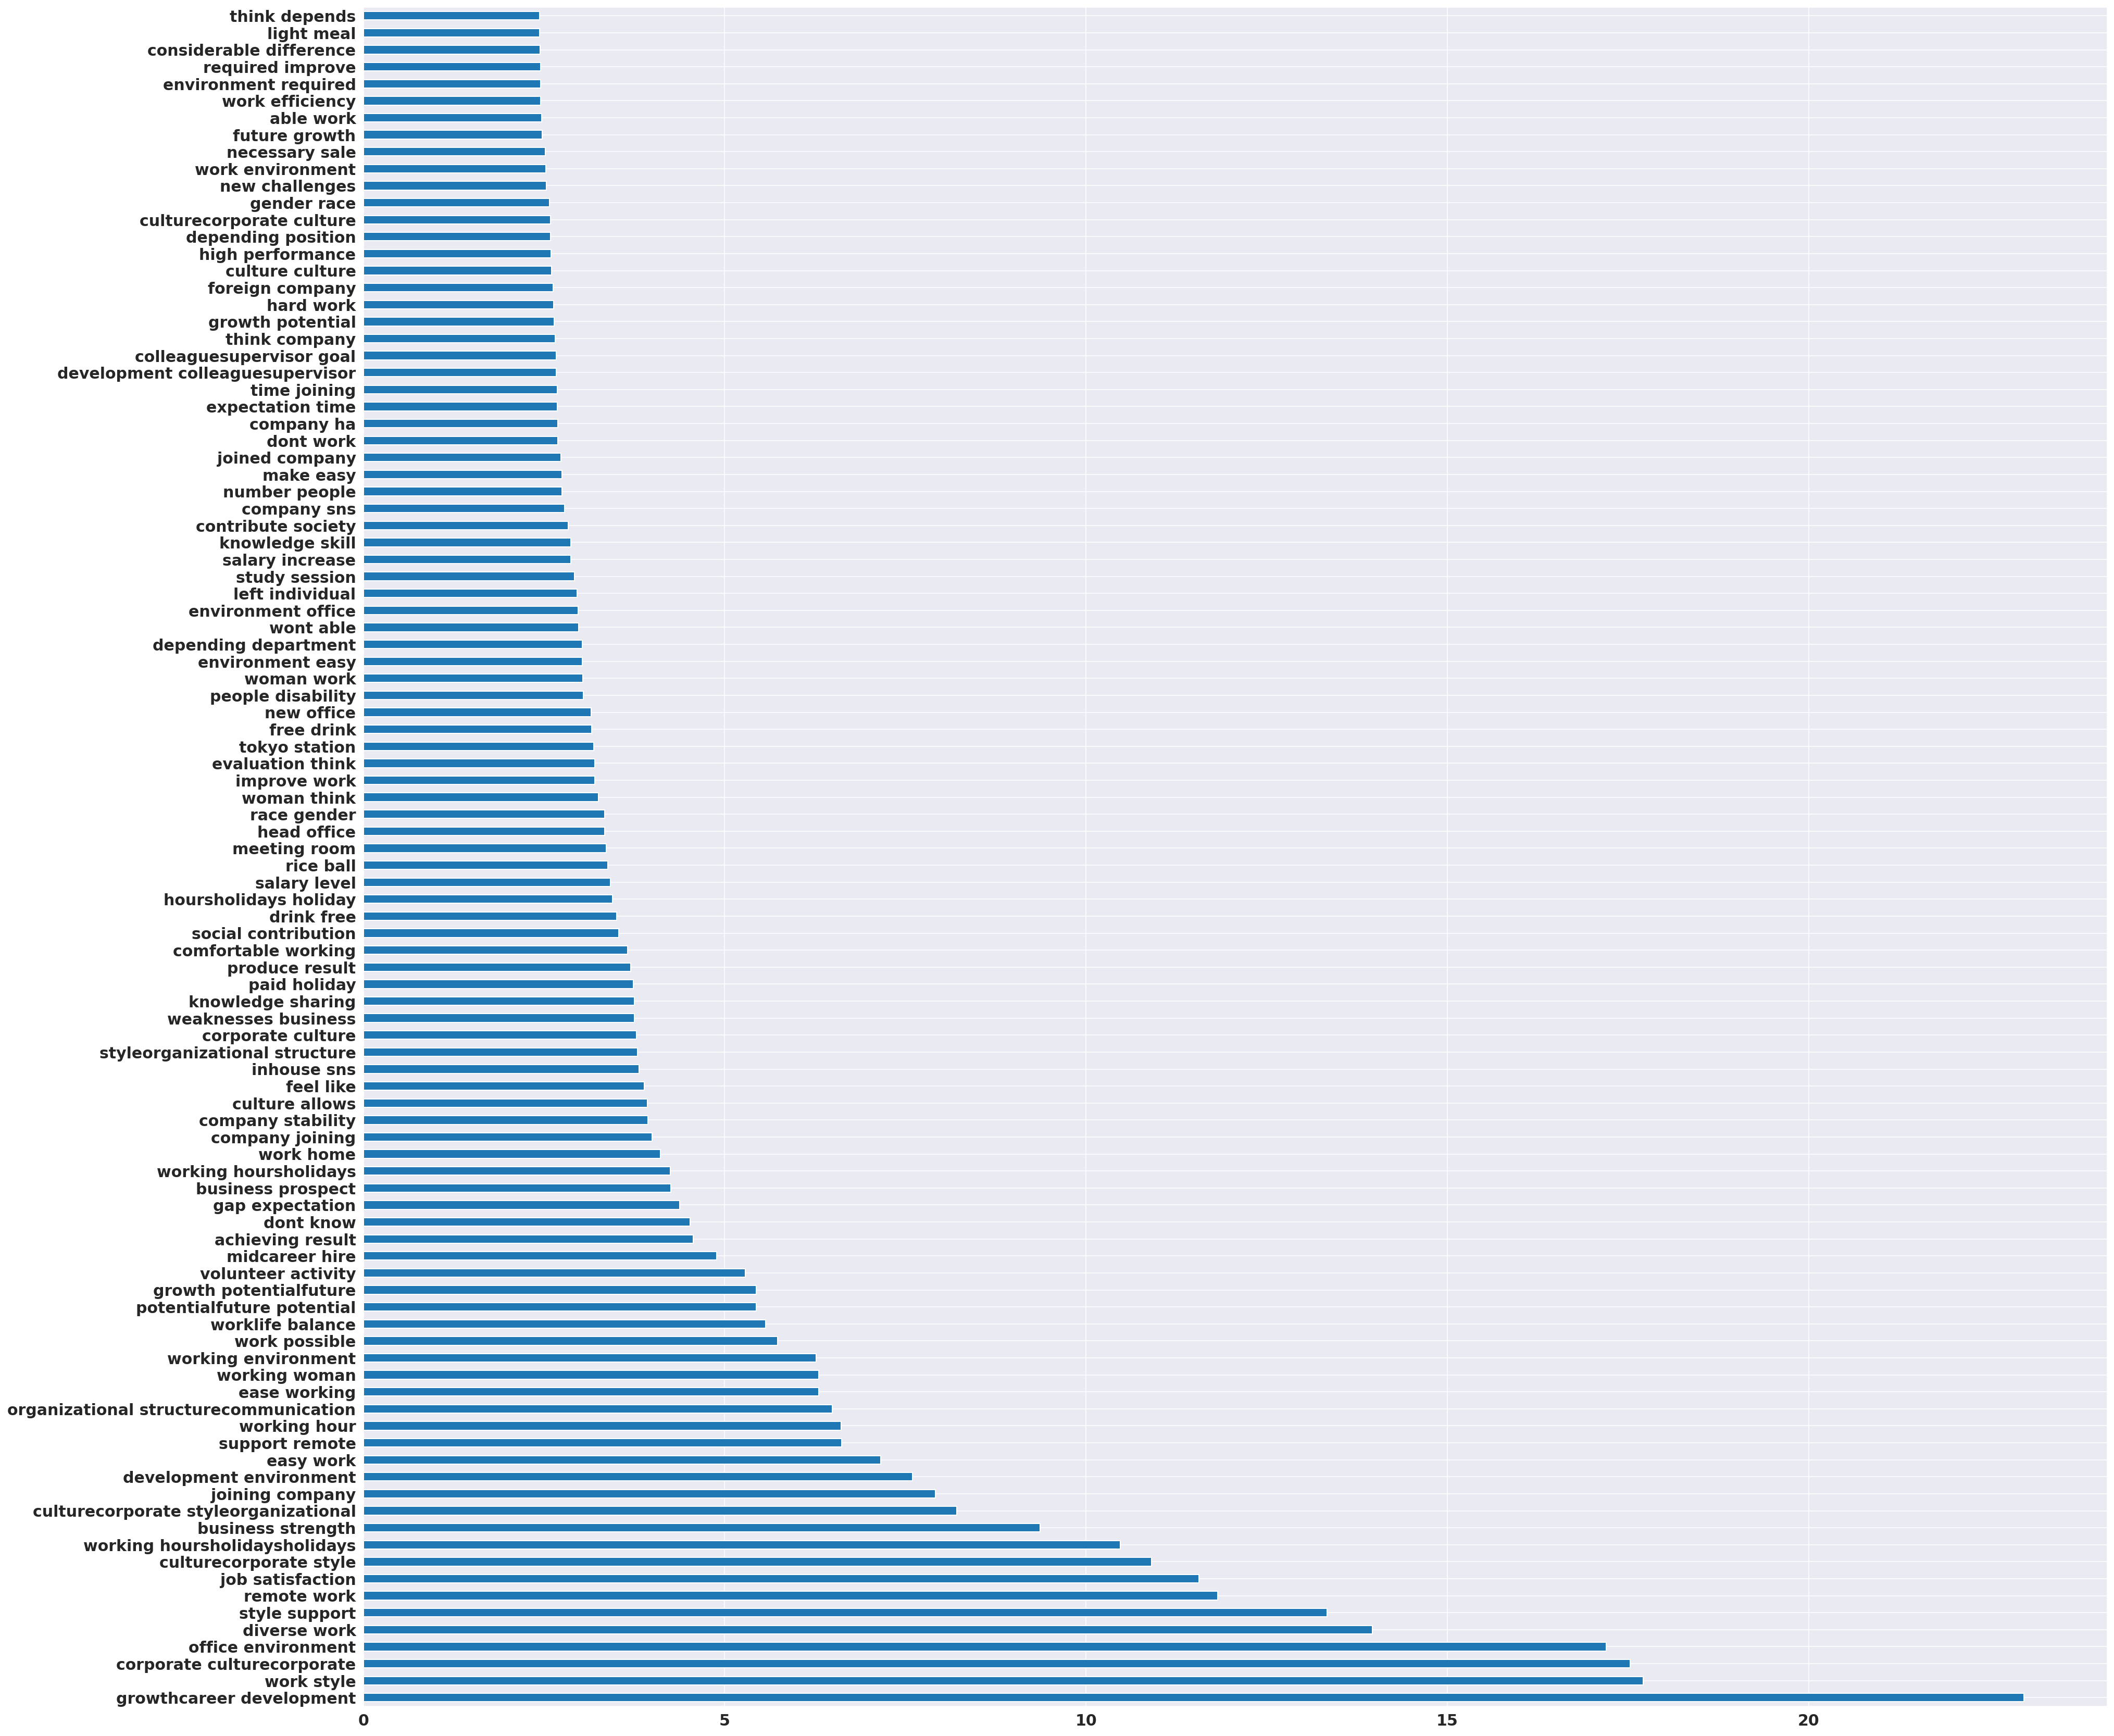

In [9]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,2))
tf.fit(senti_pos['review_translated'])

pro_tf = tf.transform(senti_pos['review_translated'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

In [10]:
df.head(1)

reviewer_info  \
0  男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員   

                                         title  rating  \
0  Work style (working hours/holidays/systems)     4.7   

                                              review         date  \
0  勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...  2022年03月 6日   

                                   review_translated  \
0  [ ' Working ' , ' HoursHolidaysHolidays ' , ' ...   

                          reviwe_translated_original sentiment emotion  \
0  Working Hours/Holidays/Holidays: It's up to yo...       neg     joy   

       em_x_senti  
0  ('joy', 'neg')

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


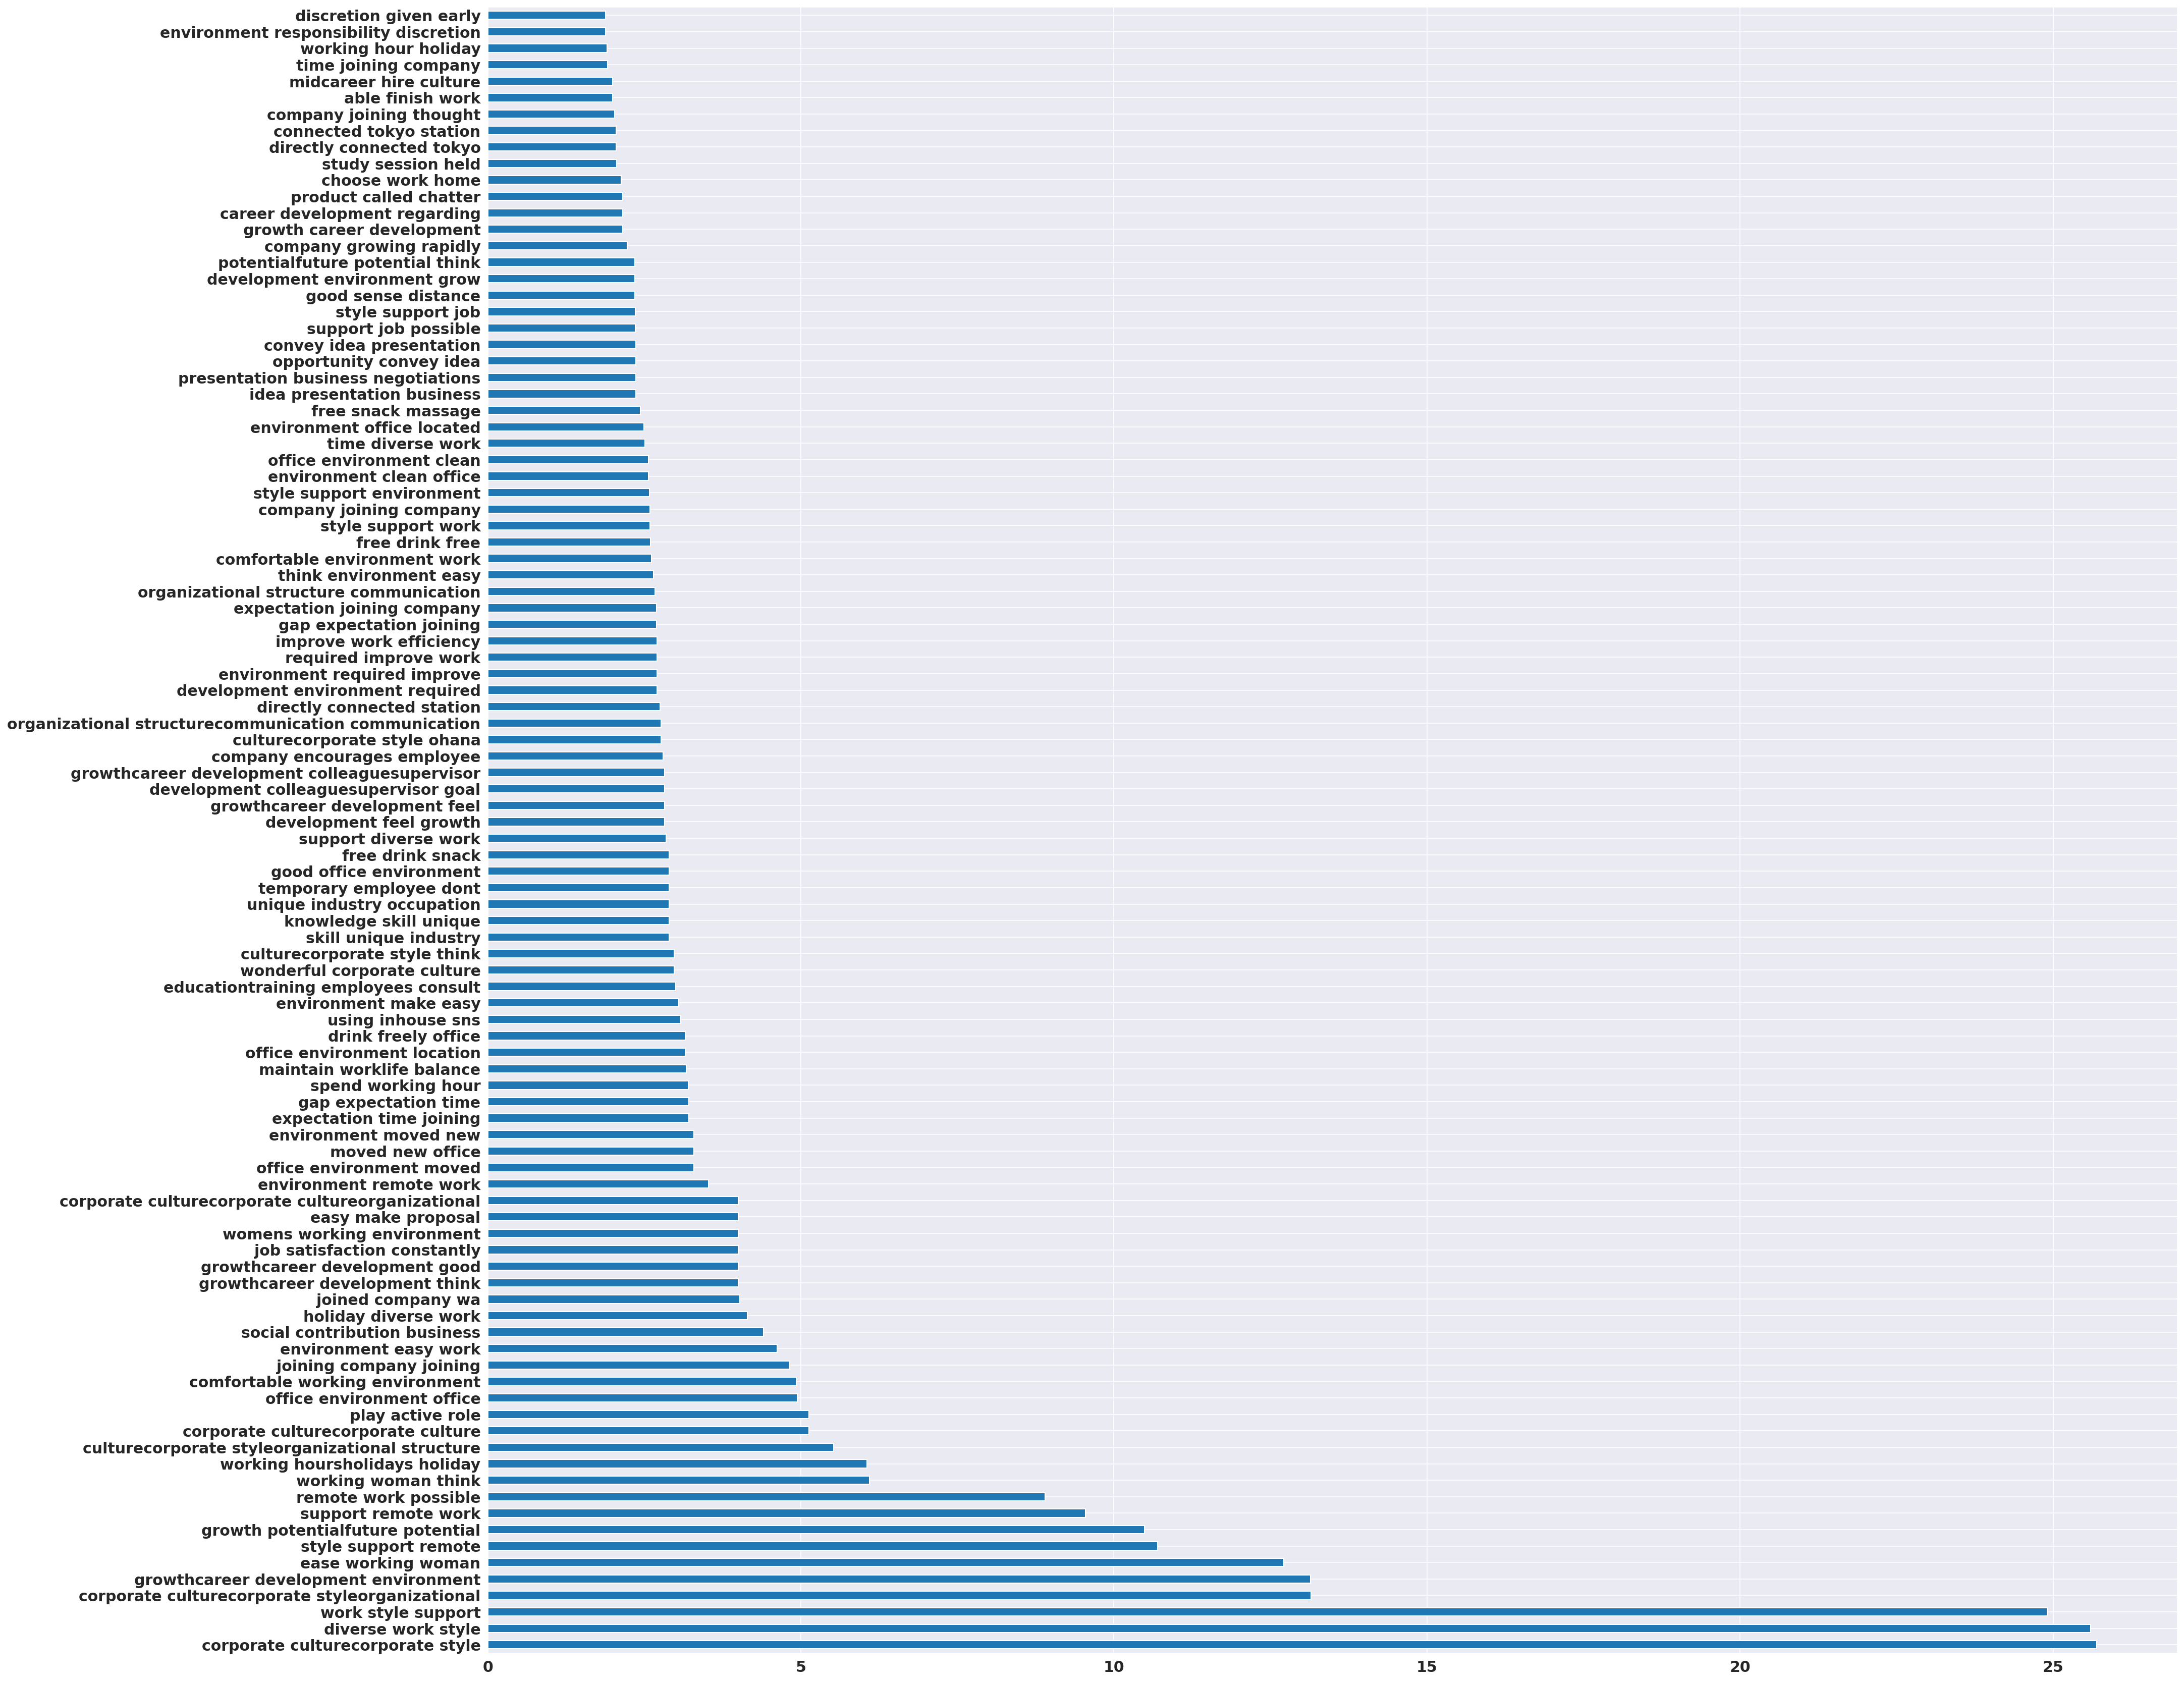

In [11]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (3,3))
tf.fit(senti_pos['review_translated'])

pro_tf = tf.transform(senti_pos['review_translated'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

### Negative

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


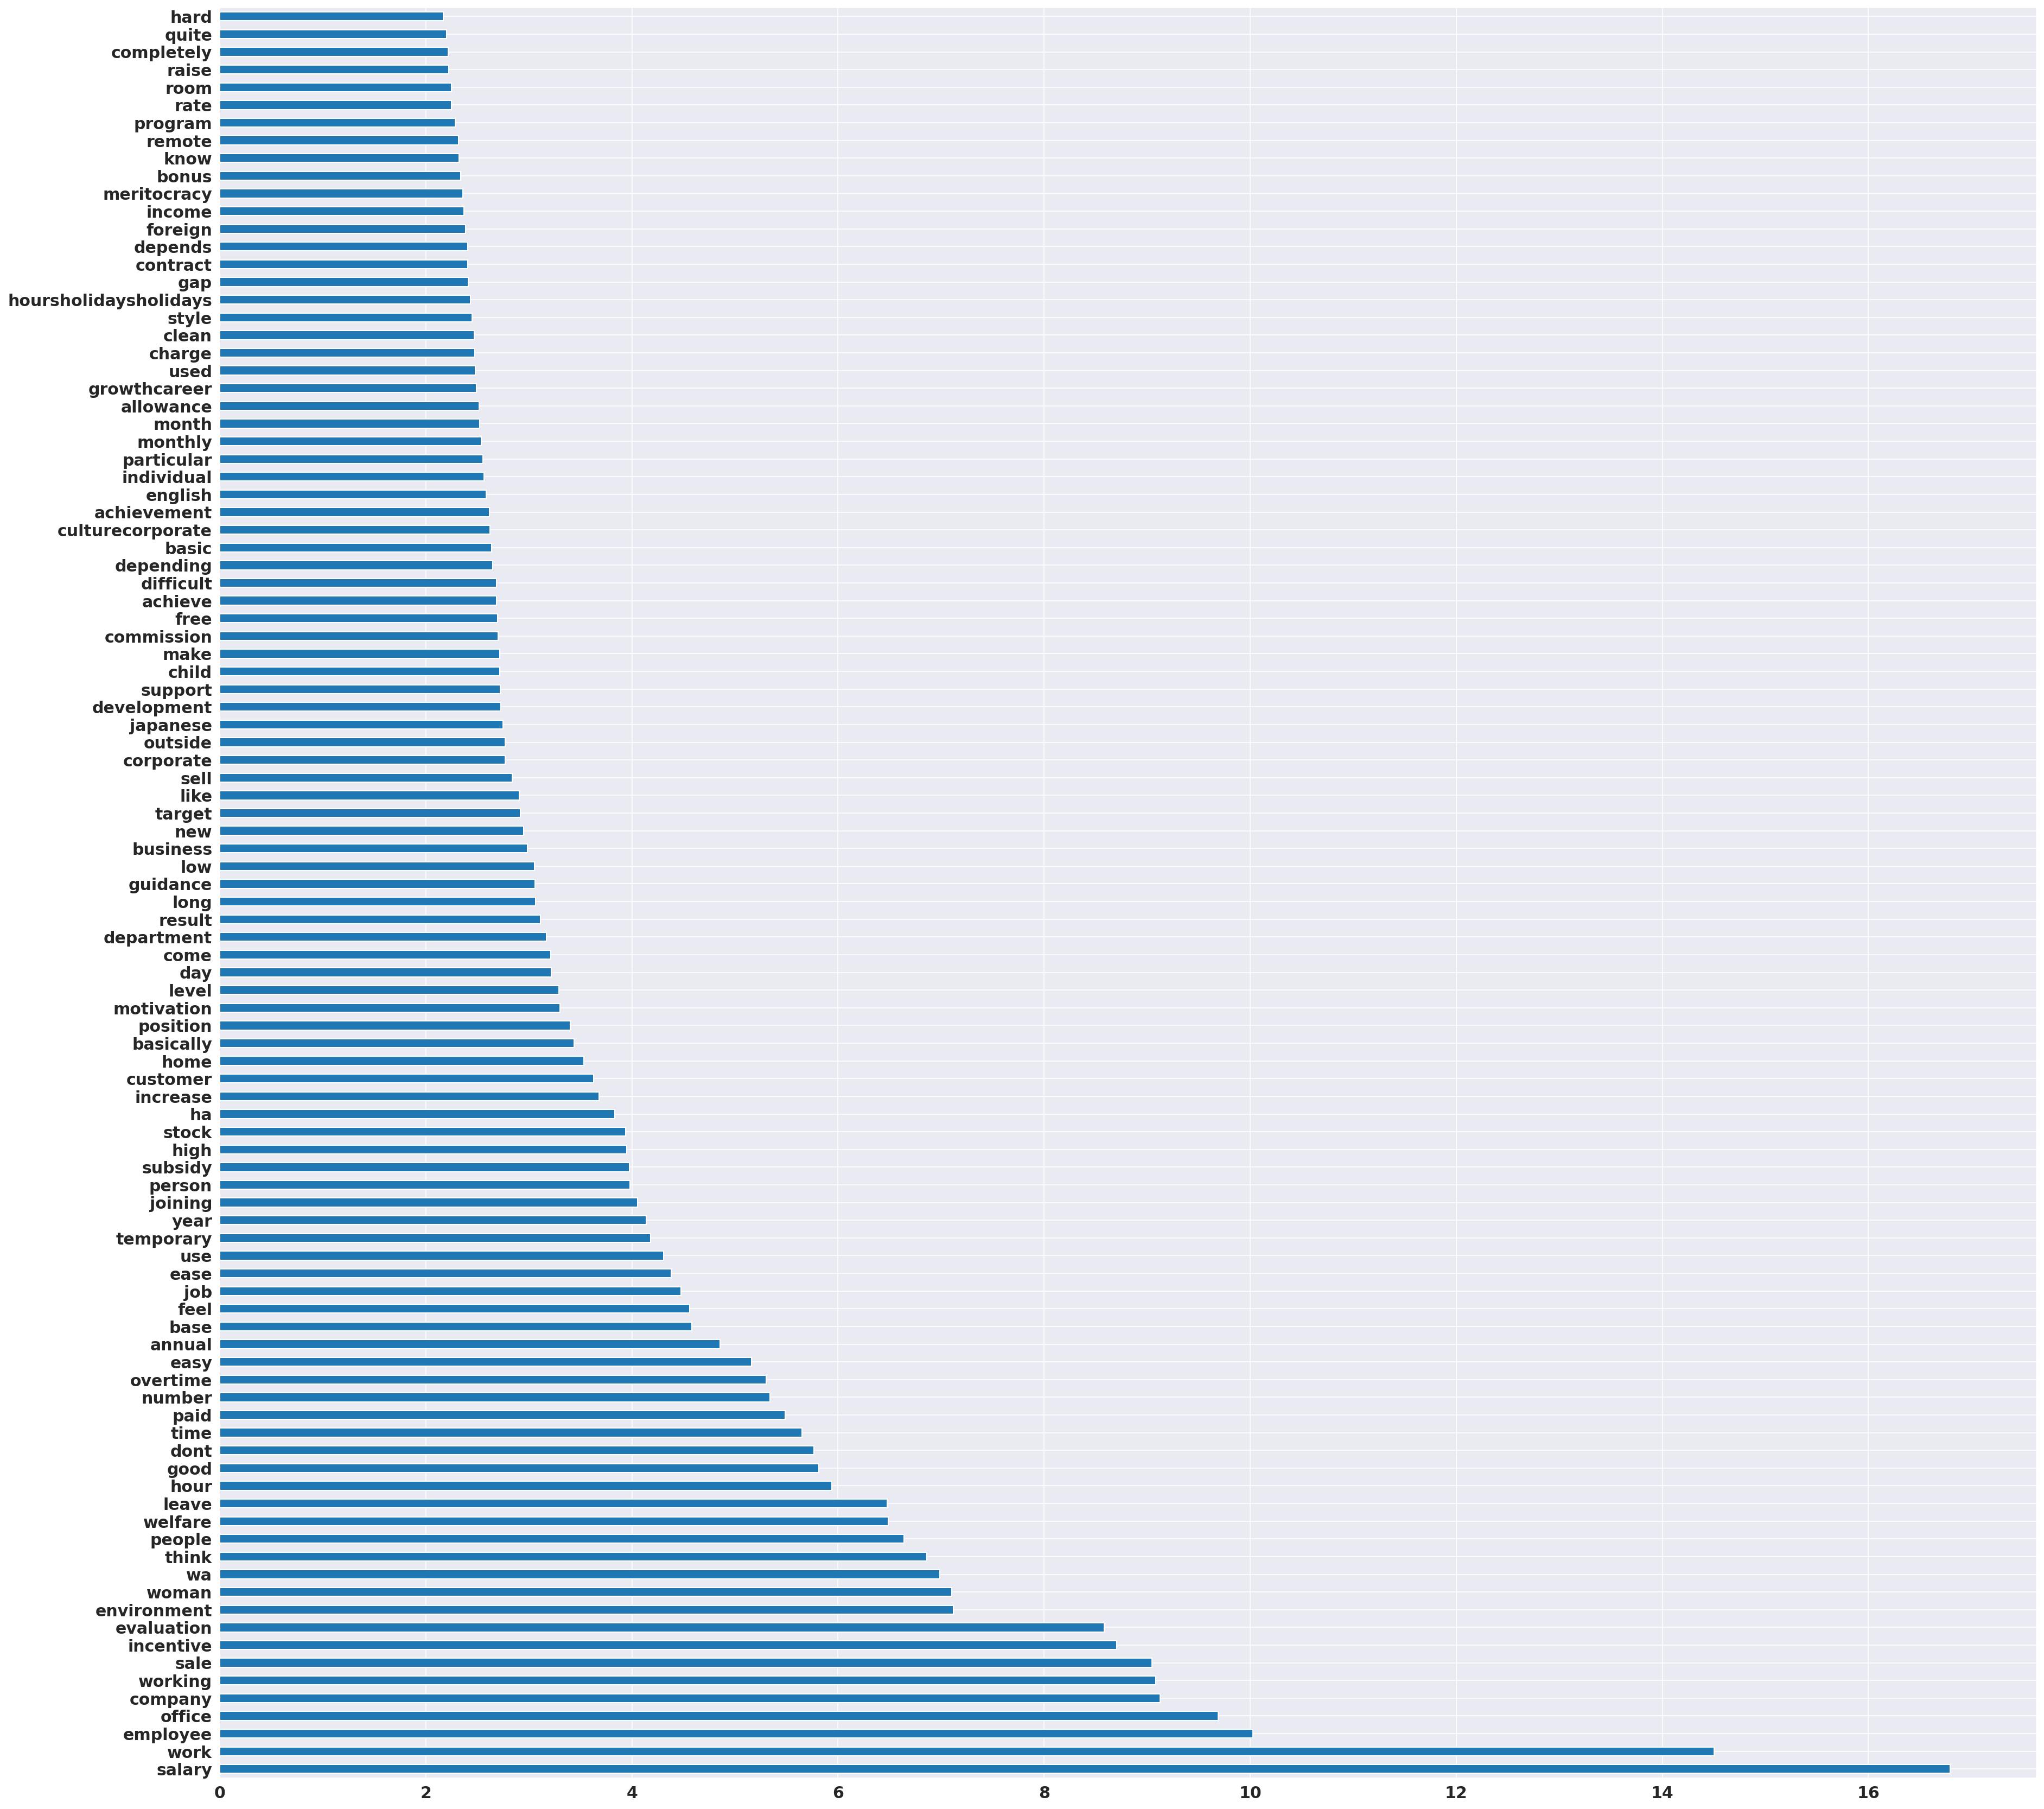

In [12]:
tf = TfidfVectorizer(stop_words='english', min_df=3)
tf.fit(senti_neg['review_translated'])

pro_tf = tf.transform(senti_neg['review_translated'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


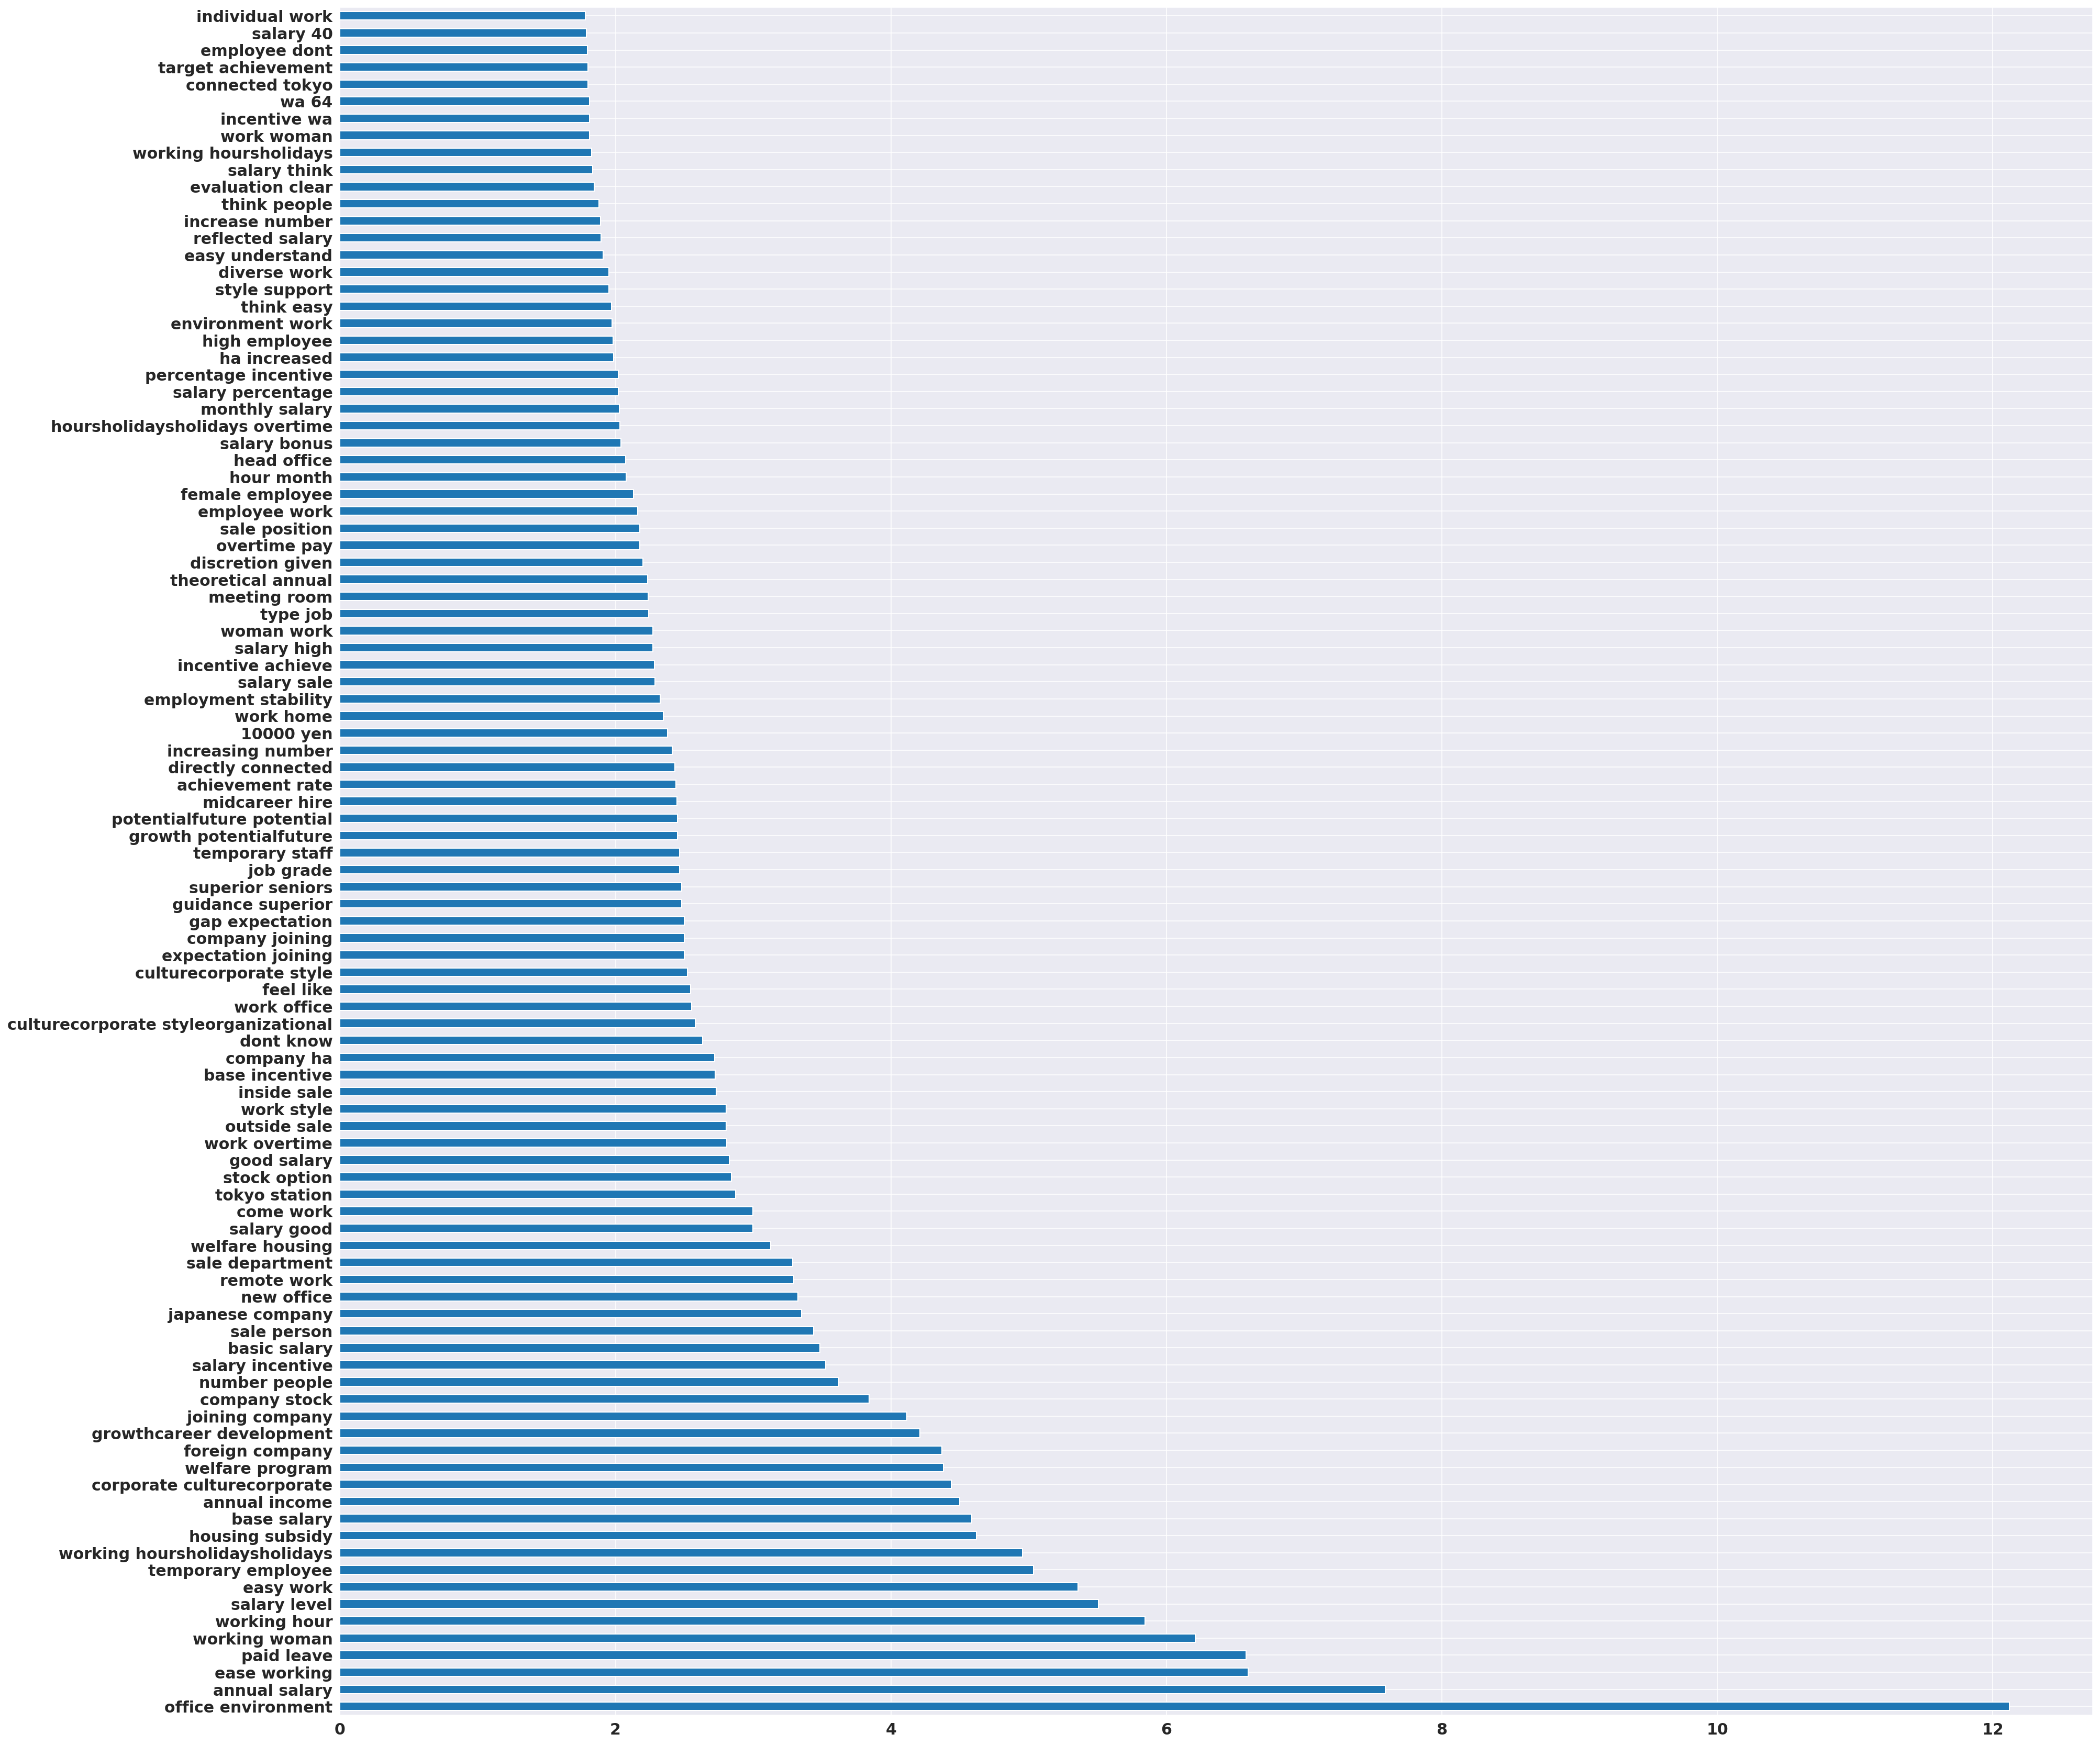

In [13]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,2))
tf.fit(senti_neg['review_translated'])

pro_tf = tf.transform(senti_neg['review_translated'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)


 

In [14]:
# # Generate a word cloud image
# stopwords = set(STOPWORDS)
# mask = np.array(Image.open("download1.png"))

Figure(432x288)


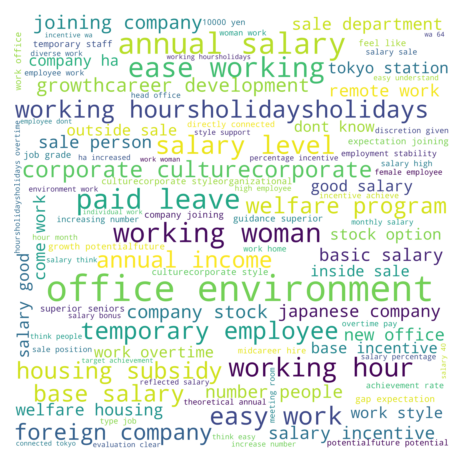

In [15]:
fig, ax = plt.subplots(1,1)
# Create and generate a word cloud image:
Cloud = WordCloud(width=5000, height=5000,
                  background_color='white',
                  stopwords=stopwords,
                  random_state=1,
                  min_font_size=3,
                  collocations=False,
#                   mask=mask,
                  contour_color='#023075',
                  contour_width=.5,
#                   colormap='Set2',
#                   colormap='rainbow',
                  min_word_length=0).generate_from_frequencies(top_texts.head(100))

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
# plt.figure(figsize=(15,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


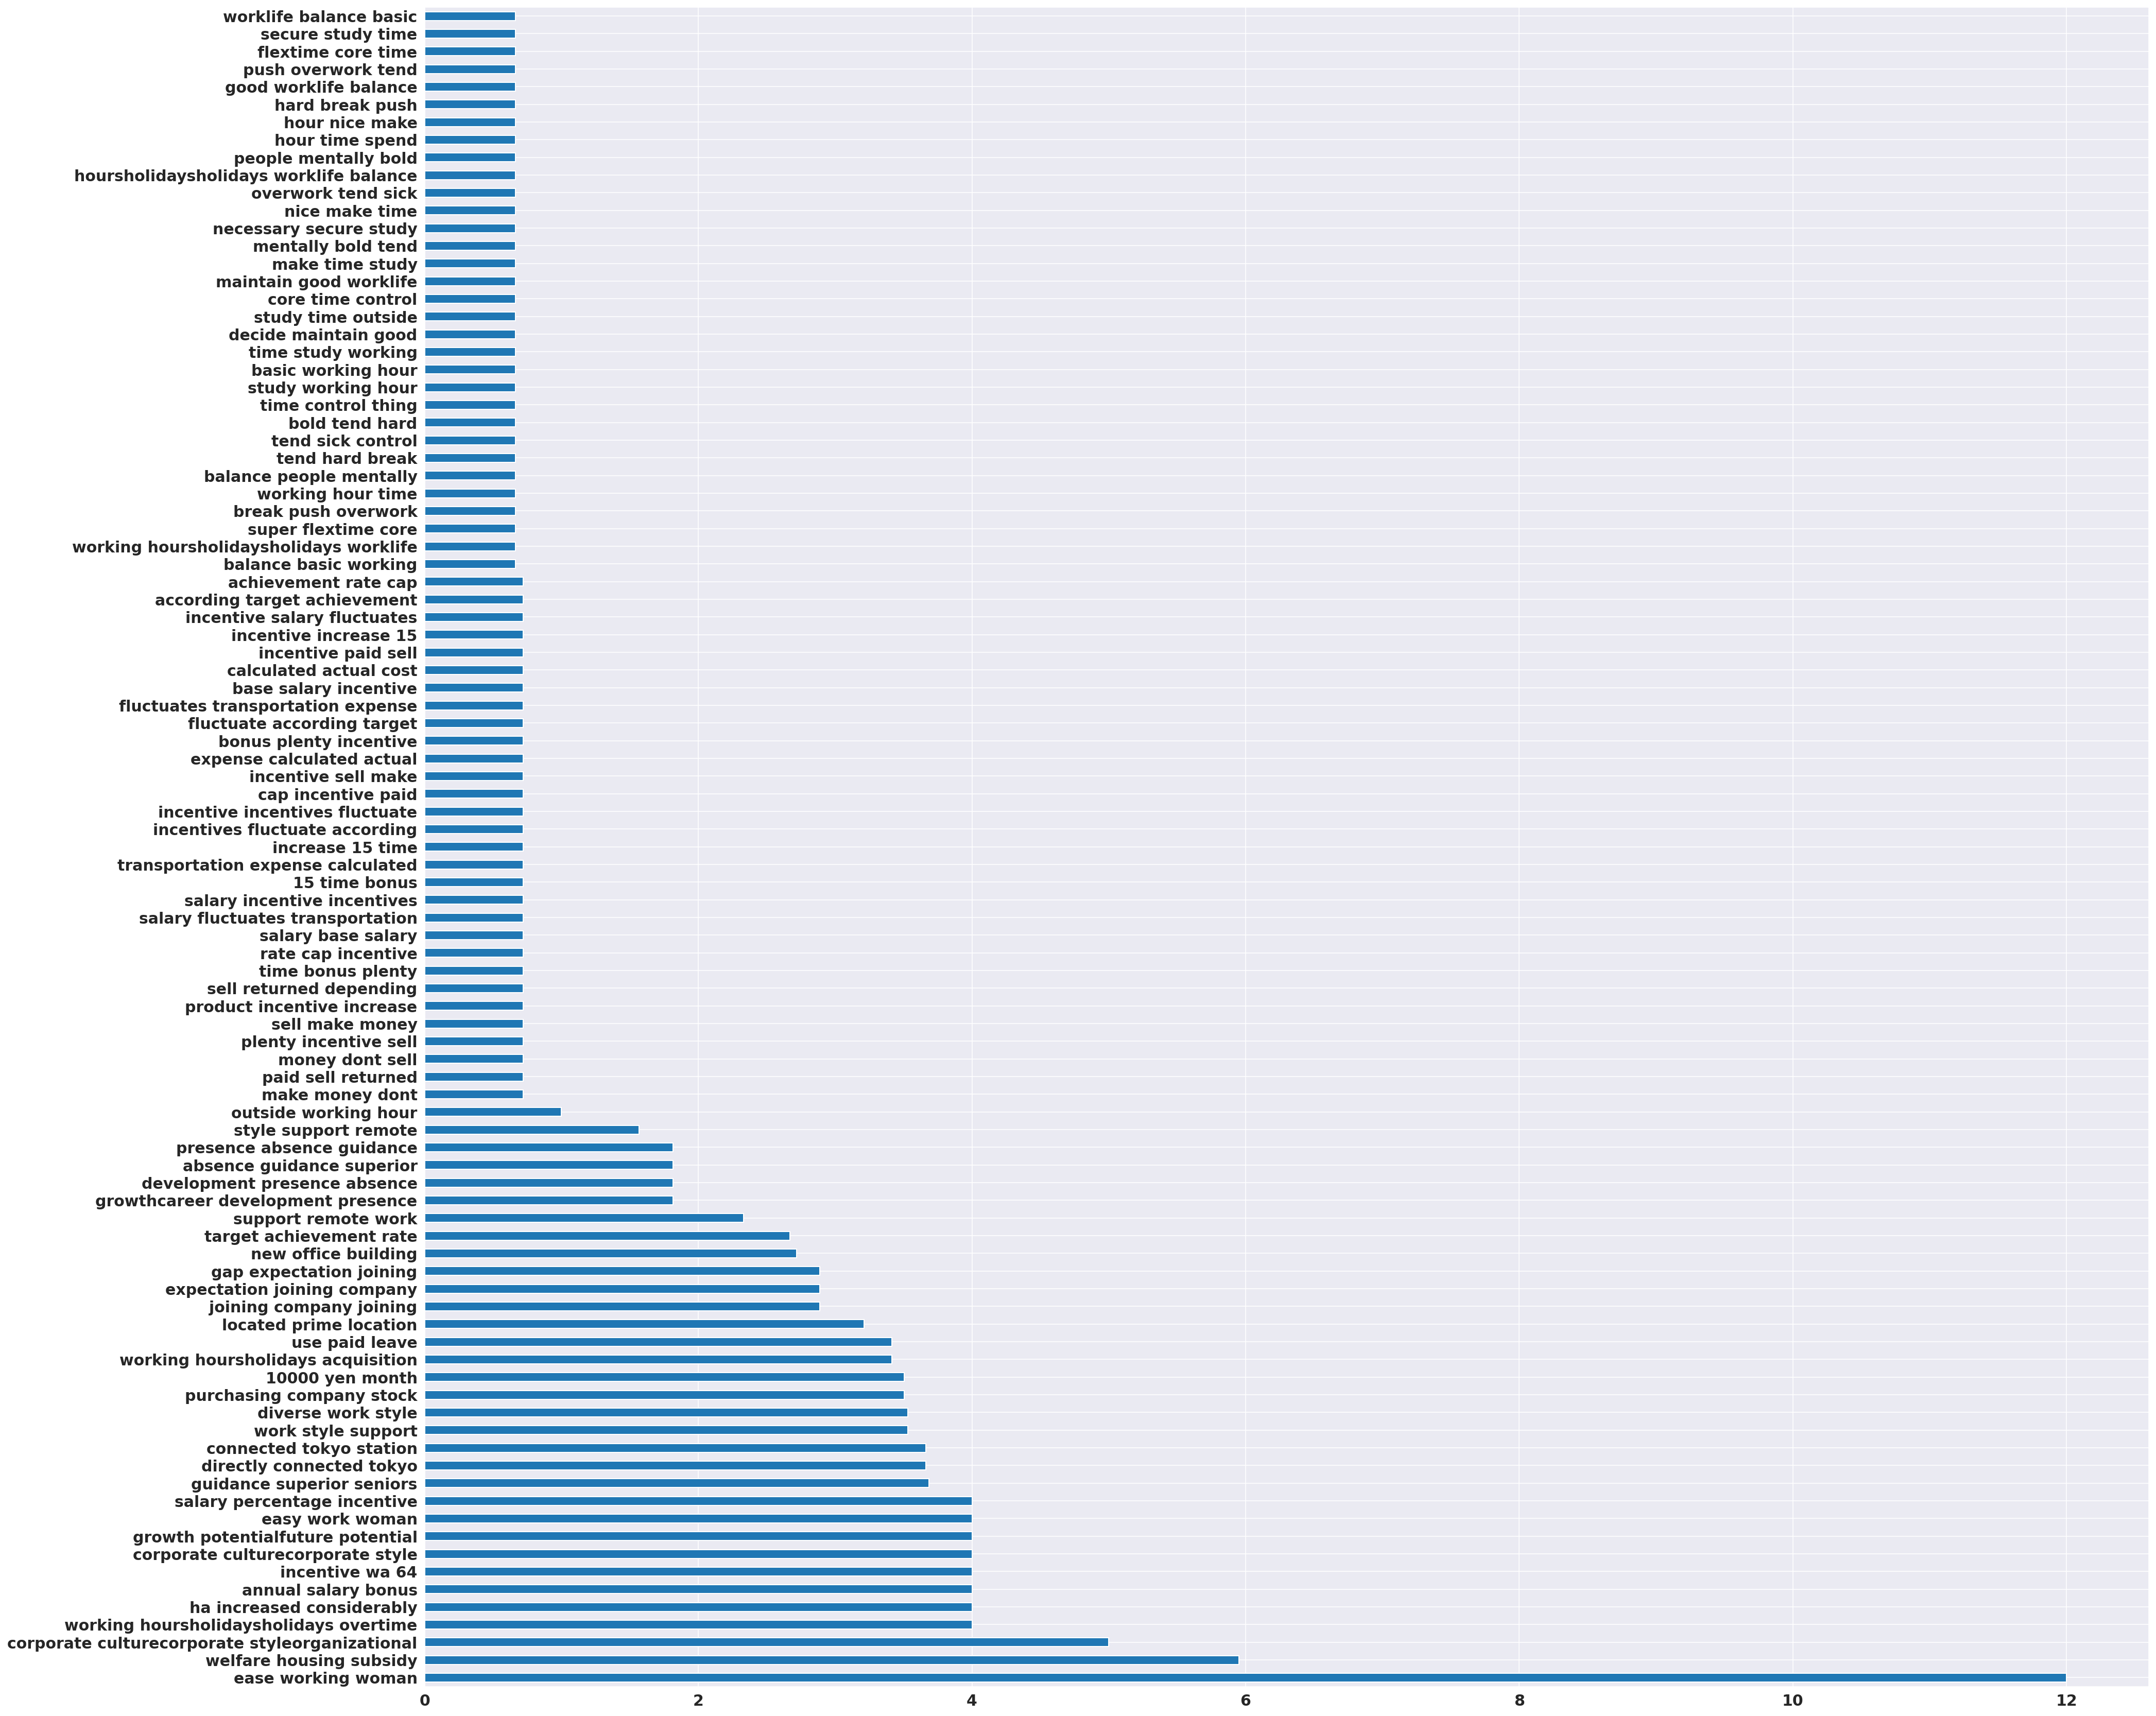

In [16]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (3,3))
tf.fit(senti_neg['review_translated'])

pro_tf = tf.transform(senti_neg['review_translated'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

In [17]:
df.columns

Index(['reviewer_info', 'title', 'rating', 'review', 'date',
       'review_translated', 'reviwe_translated_original', 'sentiment',
       'emotion', 'em_x_senti'],
      dtype='object')

In [18]:
# # office 
# office = df[df['reviwe_translated_original'].str.contains("office")]
# office_pos = office[office['sentiment'] =='pos']
# office_neg = office[office['sentiment'] =='neg']
# office_pos = office_pos['review']
# office_neg = office_neg['review']
# office_pos.to_csv('office_positive')
# office_neg.to_csv('office_negative')

In [19]:
df.head(2)

reviewer_info  \
0  男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員   
1  男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員   

                                         title  rating  \
0  Work style (working hours/holidays/systems)     4.7   
1  Work style (working hours/holidays/systems)     4.7   

                                              review         date  \
0  勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...  2022年03月 6日   
1  勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...  2021年02月23日   

                                   review_translated  \
0  [ ' Working ' , ' HoursHolidaysHolidays ' , ' ...   
1  [ ' Working ' , ' HoursHolidaysHolidays ' , ' ...   

                          reviwe_translated_original sentiment emotion  \
0  Working Hours/Holidays/Holidays: It's up to yo...       neg     joy   
1  Working Hours/Holidays/Holidays: It's up to yo...       pos     joy   

       em_x_senti  
0  ('joy', 'neg')  
1  ('joy', 'pos')

In [20]:
def strings(words = []):
    base = r'^{}'
    expr = '(?=.*{})'
    # words = ['apple', 'banana', 'cat']  # example
    strings = base.format(''.join(expr.format(w) for w in words))
    return strings

In [21]:
def create_folder(strings):
    data = df[df['reviwe_translated_original'].str.contains(strings, na=False)]
    data = data['reviwe_translated_original']
    return data.to_csv(strings)

In [23]:
create_folder(strings(['office environment']))

In [22]:
# create_folder(strings(['Trust']))
# create_folder(strings(['Innovation']))
# create_folder(strings(['Customer success']))
# create_folder(strings(['Equality']))
# create_folder(strings(['Sustainability']))